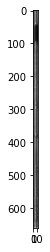

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 as cv

img_array = np.load('0_b.npy')
plt.imshow(img_array[0], cmap='gray')
plt.show()

In [2]:
import os
os.chdir('F:/data_science/Blu-Cocoon/Geotagging/Sentinel-2 Multitemporal Cities Pairs (S2MTCP) dataset/data_S21C')

In [4]:
t_norm = np.transpose(img_array, (2,1,0))
t_norm.shape

(14, 660, 601)

In [5]:
img = t_norm[0]
img

array([[1530., 1530., 1530., ..., 1427., 1427., 1458.],
       [1530., 1530., 1530., ..., 1427., 1427., 1458.],
       [1530., 1530., 1530., ..., 1427., 1427., 1458.],
       ...,
       [1979., 1979., 1979., ..., 1403., 1403., 1403.],
       [1979., 1979., 1979., ..., 1403., 1403., 1403.],
       [1979., 1979., 1979., ..., 1403., 1403., 1403.]])

In [6]:
img.shape

(660, 601)

In [8]:
ravel=img.ravel()

In [26]:
ravel1=sum(ravel)

In [29]:
ravel1

626253599.0

In [32]:
ravel2=ravel1/255
ravel2

2455896.466666667

In [31]:
660*601

396660

In [33]:
ravel2/396660

6.191439688061984

In [36]:
np.mean(ravel)

1578.817120455806

C:\Users\dhanu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


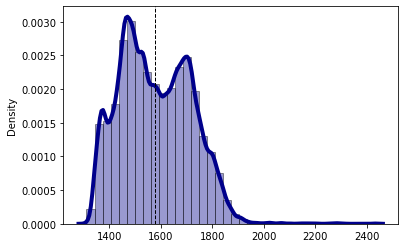

In [39]:
import seaborn as sns
sns.distplot(ravel, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.axvline(ravel.mean(), color='k', linestyle='dashed', linewidth=1)

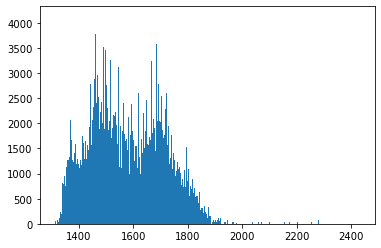

In [15]:
plt.hist(ravel,bins=500)
plt.show()

In [18]:
ravel.value_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [21]:
unique,count=np.unique(ravel,return_counts=True)

In [22]:
unique

array([1311., 1313., 1314., 1320., 1323., 1326., 1328., 1329., 1332.,
       1333., 1334., 1335., 1336., 1337., 1338., 1339., 1340., 1341.,
       1342., 1343., 1344., 1345., 1346., 1347., 1348., 1349., 1350.,
       1351., 1352., 1353., 1354., 1355., 1356., 1357., 1358., 1359.,
       1360., 1361., 1362., 1363., 1364., 1365., 1366., 1367., 1368.,
       1369., 1370., 1371., 1372., 1373., 1374., 1375., 1376., 1377.,
       1378., 1379., 1380., 1381., 1382., 1383., 1384., 1385., 1386.,
       1387., 1388., 1389., 1390., 1391., 1392., 1393., 1394., 1395.,
       1396., 1397., 1398., 1399., 1400., 1401., 1402., 1403., 1404.,
       1405., 1406., 1407., 1408., 1409., 1410., 1411., 1412., 1413.,
       1414., 1415., 1416., 1417., 1418., 1419., 1420., 1421., 1422.,
       1423., 1424., 1425., 1426., 1427., 1428., 1429., 1430., 1431.,
       1432., 1433., 1434., 1435., 1436., 1437., 1438., 1439., 1440.,
       1441., 1442., 1443., 1444., 1445., 1446., 1447., 1448., 1449.,
       1450., 1451.,

In [25]:
len(unique)

613

In [23]:
count

array([  26,   36,   36,   68,   42,   42,  106,   42,  167,   77,   36,
        151,  120,  344,  331,  240,  235,  358,  325,  465,  318,  585,
        375,  289,  431,  850,  401,  352,  391,  466,  439,  694,  392,
        300,  582,  600,  645,  505,  775,  756,  567,  570, 1013,  810,
        782,  484, 1070,  696,  801,  870,  407,  855,  498,  811,  735,
        504,  719,  613,  874,  859,  550,  568,  601,  419,  753,  451,
        444,  747,  534,  400,  459,  345,  482,  584,  609,  558,  749,
        507,  614,  709,  799,  659,  684,  594,  550,  613,  433,  772,
        580,  693,  484,  802,  815,  744,  603,  652,  630,  542,  862,
        609,  629,  415,  484,  810,  751, 1135,  971,  598, 1127,  886,
       1023,  752,  722, 1106,  814,  770,  726,  959,  879,  939, 1098,
        886,  963,  612, 1130,  943, 1015, 1141, 1253, 1045, 1282, 1423,
       1190, 1612, 1267, 1336, 1165, 1278, 1088, 1215, 1235, 1165, 1454,
       1505, 1039, 1145, 1325, 1190, 1342, 1249, 11

In [24]:
len(count)

613

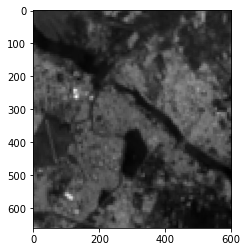

In [8]:
# Display image in gray scale
plt.imshow(img, cmap='gray')

In [26]:
# Store gray image array to png image 
plt.imsave('geotag_im.png', img, cmap='gray')

TypeError: Image data of dtype object cannot be converted to float

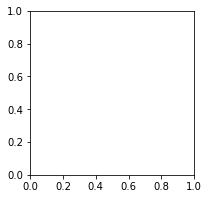

In [10]:
# Enhancedment Process
# ---------------------------------------------------------------------

# Input Gray Image
gray_img = cv.imread('geotag_im.png',0)

# Image Enhancement Process
# Method 1: Applying Histograms Equalization
# --------------------------------------------------------------------
enh_img_hst = cv.equalizeHist(gray_img)
# --------------------------------------------------------------------

# Method 2: Applying CLAHE (Contrast Limited Adaptive Histogram Equalization)
# Image is divided into small blocks (8x8) applied for histogram equalization. Contrast limiting is applied 
# to avoid noise based on comparing histogram bin with specified contrast limit (default is 40) 
# --------------------------------------------------------------------
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
enh_img_clahe = clahe.apply(gray_img)
# --------------------------------------------------------------------

# Append resulting images side-by-side
#enh_img = np.hstack((gray_img, enh_img_hst, enh_img_clahe))
#plt.imshow(enh_img, cmap='gray', aspect='equal')

# Display Result
# --------------------------------------------------------------------
# create figure
fig = plt.figure(figsize=(10, 7))

# setting values to rows and column variables
rows = 1
columns = 3
res_img = [gray_img, enh_img_hst, enh_img_clahe]
res_img_title = ['Input Image', 'Histogram Equalized', 'Enhanced Histogram Equalized']

for idx in range(columns):
    fig.add_subplot(rows, columns, idx+1)
    plt.imshow(res_img[idx], cmap='gray')
    plt.axis('off')
    plt.title(res_img_title[idx])


In [11]:
# Canny edge detection based on lower and upper thresholding
def edge_detection(img, lower_th = None, upper_th = None):
             
    # Noise reduction step
    img = cv.GaussianBlur(img, (5, 5), 1.4)
    
    # Calculating the gradients
    gx = cv.Sobel(np.float32(img), cv.CV_64F, 1, 0, 3)
    gy = cv.Sobel(np.float32(img), cv.CV_64F, 0, 1, 3)
      
    # Conversion of Cartesian coordinates to polar 
    mag, ang = cv.cartToPolar(gx, gy, angleInDegrees = True)
       
    # set the minimum and maximum thresholds as lower and upper 
    mag_max = np.max(mag)
    if not lower_th:lower_th = mag_max * 0.1
    if not upper_th:upper_th = mag_max * 0.5
      
    # getting the dimensions of the input image  
    height, width = img.shape
       
    # Looping through every pixel of the grayscale 
    # image
    for i_x in range(width):
        for i_y in range(height):
               
            grad_ang = ang[i_y, i_x]
            grad_ang = abs(grad_ang-180) if abs(grad_ang)>180 else abs(grad_ang)
               
            # selecting the neighbours of the target pixel according to the gradient direction
            # In the x axis direction
            if grad_ang<= 22.5:
                neighb_1_x, neighb_1_y = i_x-1, i_y
                neighb_2_x, neighb_2_y = i_x + 1, i_y
              
            # top right (diagnol-1) direction
            elif grad_ang>22.5 and grad_ang<=(22.5 + 45):
                neighb_1_x, neighb_1_y = i_x-1, i_y-1
                neighb_2_x, neighb_2_y = i_x + 1, i_y + 1
              
            # In y-axis direction
            elif grad_ang>(22.5 + 45) and grad_ang<=(22.5 + 90):
                neighb_1_x, neighb_1_y = i_x, i_y-1
                neighb_2_x, neighb_2_y = i_x, i_y + 1
              
            # top left (diagnol-2) direction
            elif grad_ang>(22.5 + 90) and grad_ang<=(22.5 + 135):
                neighb_1_x, neighb_1_y = i_x-1, i_y + 1
                neighb_2_x, neighb_2_y = i_x + 1, i_y-1
              
            # Now it restarts the cycle
            elif grad_ang>(22.5 + 135) and grad_ang<=(22.5 + 180):
                neighb_1_x, neighb_1_y = i_x-1, i_y
                neighb_2_x, neighb_2_y = i_x + 1, i_y
               
            # Non-maximum suppression step
            if width>neighb_1_x>= 0 and height>neighb_1_y>= 0:
                if mag[i_y, i_x]<mag[neighb_1_y, neighb_1_x]:
                    mag[i_y, i_x]= 0
                    continue
   
            if width>neighb_2_x>= 0 and height>neighb_2_y>= 0:
                if mag[i_y, i_x]<mag[neighb_2_y, neighb_2_x]:
                    mag[i_y, i_x]= 0
   
    lower_ids = np.zeros_like(img)
    upper_ids = np.zeros_like(img)              
    ids = np.zeros_like(img)
       
    # double thresholding step
    for i_x in range(width):
        for i_y in range(height):
              
            grad_mag = mag[i_y, i_x]
              
            if grad_mag < lower_th:
                mag[i_y, i_x]= 0
            elif upper_th > grad_mag>= lower_th:
                ids[i_y, i_x]= 1
            else:
                ids[i_y, i_x]= 2
           
    # returning the magnitude of gradients of edges
    return mag


In [12]:
# Finding edges of image
canny_gray_img = edge_detection(gray_img)
canny_img_hist = edge_detection(enh_img_hst)
canny_img_clahe = edge_detection(enh_img_clahe)

edge_res_img = [canny_gray_img, canny_img_hist, canny_img_clahe]
edge_img_title = ['Input Image', 'Histogram Equalized', 'Enhanced Histogram Equalized']

#plt.imshow(canny_img_clahe, cmap='gray')

# create figure
fig = plt.figure(figsize=(10, 7))

# setting values to rows and column variables
rows = 1
columns = 3

for idx in range(columns):
    fig.add_subplot(rows, columns, idx+1)
    plt.imshow(edge_res_img[idx], cmap='gray')
    plt.axis('off')
    plt.title(edge_img_title[idx])

error: OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-un3v4p08\opencv\modules\imgproc\src\smooth.dispatch.cpp:617: error: (-215:Assertion failed) !_src.empty() in function 'cv::GaussianBlur'


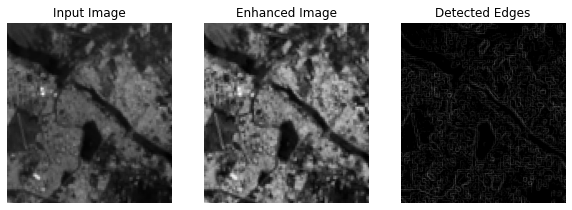

In [9]:
result_img = [gray_img, enh_img_clahe, canny_img_clahe]
result_img_title = ['Input Image', 'Enhanced Image', 'Detected Edges']

# create figure
fig = plt.figure(figsize=(10, 7))

# setting values to rows and column variables
rows = 1
columns = 3

for idx in range(columns):
    fig.add_subplot(rows, columns, idx+1)
    plt.imshow(result_img[idx], cmap='gray')
    plt.axis('off')
    plt.title(result_img_title[idx])

In [10]:
# Store resulting image array to png image 
plt.imsave('Enhanced_im.png', enh_img_clahe, cmap='gray')
plt.imsave('edge_im.png', canny_img_clahe, cmap='gray')

In [7]:
cv.imshow('gray_img', gray_img)
cv.imshow('enh_img_hst', enh_img_hst)
cv.imshow('enh_img_clahe', enh_img_clahe)
cv.waitKey(0)
cv.destroyAllWindows()

In [16]:
from PIL import Image as im
# creating image object of resulting array
data_im = im.fromarray(t_norm[0])
# saving the final output as a PNG file
data_im.save('geotag_im.png')

OSError: cannot write mode F as PNG

In [10]:
norm = plt.Normalize(np.min(img_array), np.max(img_array))

In [3]:
img_array.shape

(601, 660, 14)

NameError: name 'base' is not defined

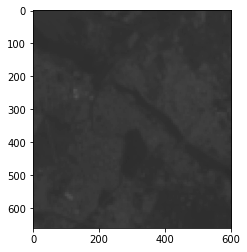

In [5]:
norm = plt.Normalize(np.min(img_array), np.max(img_array))
for n, xy in enumerate(np.transpose(img_array, (2,1,0))):
    plt.imshow(xy, cmap='gray', norm=norm)
    fname = base+"%2.2d"%xy+".png"